In [1]:
pip install qiskit


[notice] A new release of pip available: 23.1.1 -> 23.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# general
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math
import time
import matplotlib.pyplot as plt
import seaborn as sns

from io import BytesIO


# qiskit library
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import Aer
from qiskit import execute
from qiskit import transpile

from qiskit.circuit.library import XGate

from qiskit.quantum_info.states import Statevector 
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import state_fidelity, average_gate_fidelity, process_fidelity

# qiskit visualization
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector


# function 

In [3]:

## Given QuantumCircut Class and pyplot ax of subplots, drow subplots of quantum state histogram
def plot_hist_states(qc, ax):
    simulator = Aer.get_backend('aer_simulator')
    circ = transpile(qc, simulator)
    result = simulator.run(qc).result()

    counts = result.get_counts()

    return plot_histogram(counts, ax=ax)


# Q1. 
Which statement will create a quantum circuit with four quantum
bits and four classical bits?

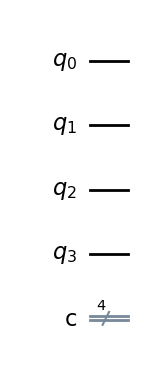

In [4]:
#selection[C]
qc = QuantumCircuit(QuantumRegister(4, "q"), ClassicalRegister(4, "c"))
qc.draw()

## Q2. 

Text(0.5, 1.0, 'final')

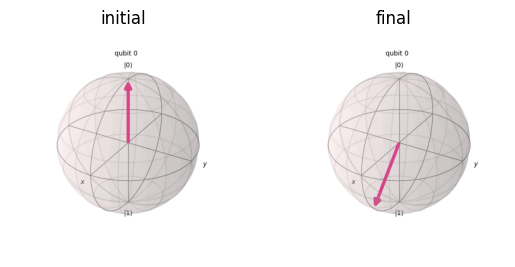

In [5]:
# draw the state vector in the bloch sphere 

## 1. draw initial states
qc = QuantumCircuit(1) #prepare 1 q-bit
simulator = Aer.get_backend("statevector_simulator")
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()
pltfig_initial = plot_bloch_multivector(statevector)

## 2. draw final states which Ry(3/4 pi) is applied to
qc.ry(3/4*np.pi,0)
simulator = Aer.get_backend("statevector_simulator")
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()
pltfig_final = plot_bloch_multivector(statevector)


## create subplots to show two figures
fig, axes = plt.subplots(1,2)


for i, img in enumerate([pltfig_initial, pltfig_final]):
    #convert Figure object to array to output in subplots
    buf = BytesIO()
    img.savefig(buf, format='png')
    buf.seek(0)
    img_data=buf.getvalue()
    
    img_array=plt.imread(BytesIO(img_data))
    axes[i].imshow(img_array)
    axes[i].axis("off")

axes[0].set_title("initial")
axes[1].set_title("final")

Text(-0.3, 700, "probabity to get '0' state is 0.1455")

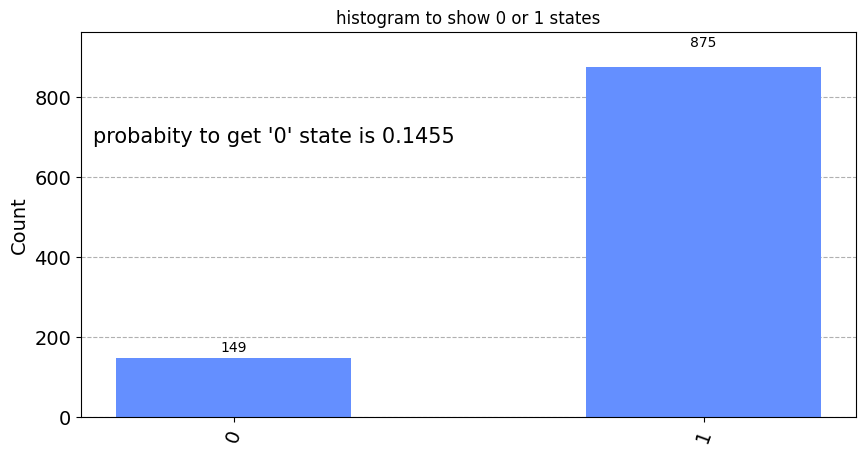

In [6]:
## get histogram for each qbit-state

qc = QuantumCircuit(1,1) # 1 qubit, 1 classical bit
qc.ry(3*np.pi/4, 0)# rotate qubit 0 by pi/4 around y-axis
qc.measure(0,0) # measure qubit 0 to classical bit 0
#qc.draw() # draw circuit

fig, axes = plt.subplots(1, 1, figsize=(10,5))
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)
result = simulator.run(qc).result()
counts = result.get_counts()
plot_histogram(counts, ax=axes)
probability_0 = counts['0']/sum(counts.values())

axes.set_title("histogram to show 0 or 1 states")
axes.text(-0.3,700,"probabity to get '0' state is {}".format(round(probability_0,4)), fontsize=15, va='center')


## Q3.

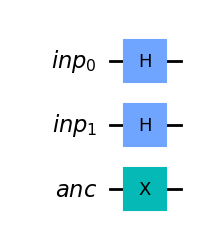

In [12]:
inp_reg = QuantumRegister(2, "inp")
ancilla = QuantumRegister(1, "anc")

qc = QuantumCircuit(inp, anc)
qc.h(inp)
qc.x(anc)
qc.draw()

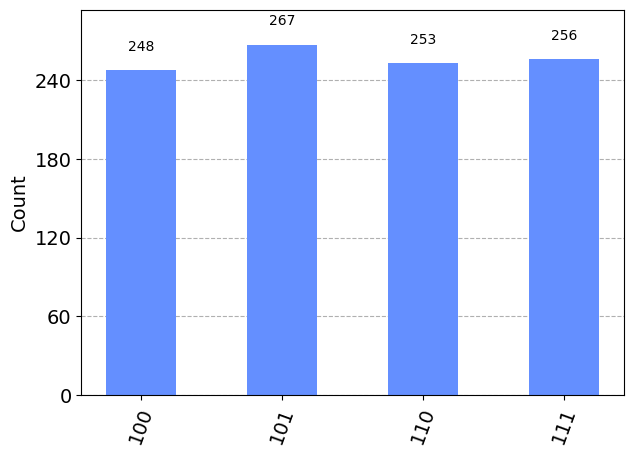

In [13]:
meas = ClassicalRegister(3)
qc = QuantumCircuit(inp_reg, ancilla, meas)


qc.h(inp_reg[0:2])
qc.x(ancilla)
qc.measure([0,1, 2],[0,1,2])
qc.draw()

#simulating 
simulator = Aer.get_backend("aer_simulator")
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts()
plot_histogram(counts)


# Q4. 

In [ ]:
qc = QuantumCircuit(3,3)

#qc.measure([0,1,2],[0,1,2])
#qc.measure([0,0],[1,1],[2,2])
qc.measure_all(add_bits=False)
#qc.measure_all()
#qc.measure(0,1,2)
qc.draw()

In [ ]:
#量子，古典レジスタを個別に指定する場合
qubits = QuantumRegister(3, "q")
cbits = ClassicalRegister(3, "c")
qc = QuantumCircuit(qubits, cbits)
qc.measure(qubits, cbits)
qc.draw()

In [ ]:
#measure_allは指定しない場合，測定用の古典ビットを自動で追加する
qc = QuantumCircuit(3)
qc.measure_all()
qc.draw()

#既存の古典ビットで測定したい場合は，measure_allの条件にadd_bits=Falseとする。
qc = QuantumCircuit(3,3) #
qc.measure_all(add_bits=False)
qc.draw()

'''
qc = QuantumCircuit(3,3) #
qc.measure_all(add_bits=False, inplace=False)
qc.draw()
'''

In [ ]:
ig, axes = plt.subplots(3,2, figsize=(15,10))
axax = axes.ravel()

# selection [A]
qc = QuantumCircuit(2,2)
v = [1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]
qc.initialize(v,[0,1])
#qc.measure([0,1], [0,1])
qc.measure_all()
plot_hist_states(qc, axax[0])
axax[0].set_title("A")

# selection [B]
qc = QuantumCircuit(2)
qc.h(0)  
qc.cx(0,1)
qc.measure_all()
plot_hist_states(qc, axax[1])
axax[1].set_title("B")

# selection [C]
v1 = [1,0]
v2 = [0,1]

qc = QuantumCircuit(2)
qc.initialize(v1, 0)
qc.initialize(v2, 1)
qc.measure_all()
plot_hist_states(qc, axax[2])
axax[2].set_title("C")

# selection [D]
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.measure_all()
plot_hist_states(qc, axax[3])
axax[3].set_title("D")

# selection [E]
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.measure_all()
plot_hist_states(qc, axax[4])
axax[4].set_title("E")

fig.tight_layout()
fig.show()

In [ ]:
qc.draw()

# Q5. 

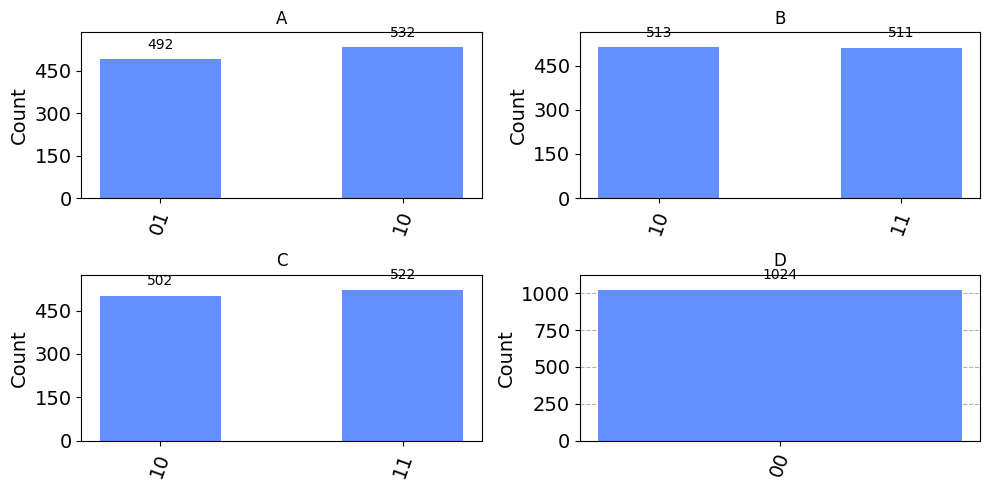

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axax=axes.ravel()

## 各選択肢ごとの量子回路を作成，その状態のヒストグラムを描画する
#[A]
bell = QuantumCircuit(2,2) # 1 qubit, 1 classical bit
bell.h(0)
bell.x(1)
bell.cx(0,1)
bell.measure([0,1],[0,1])
plot_hist_states(bell, axax[0])
axax[0].set_title("A")

#selection = ["A", "B", "C", "D"]

#[B]
bell = QuantumCircuit(2, 2)
bell.cx(0,1)
bell.h(0)
bell.x(1)
bell.measure([0,1], [0,1])
plot_hist_states(bell, axax[1])
axax[1].set_title("B")

#[C]
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.x(1)
bell.cz(0,1)
bell.measure([0,1], [0,1])
plot_hist_states(bell, axax[2])
axax[2].set_title("C")


#[D]
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.h(0)
bell.measure([0,1], [0,1])
plot_hist_states(bell, axax[3])
axax[3].set_title("D")

fig.tight_layout()
fig.show()


# Q6. 


 Given this code, which two inserted code fragments result in the state vector represented by this Bloch sphere?

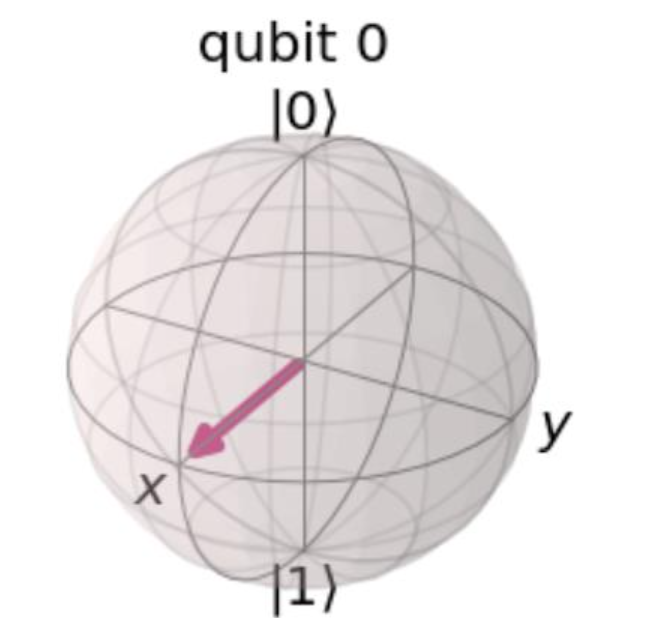

```
qc = QuantumCircuit(1,1)

### Insert code fragment here
  
simulator = Aer.get_backend('statevector_simulator') job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc) plot_bloch_multivector(outputstate)
```

- A. qc.h(0)
- B. qc.rx(math.pi / 2, 0)
- C. qc.ry(math.pi / 2, 0)
- D. qc.rx(math.pi / 2, 0) qc.rz(-math.pi / 2, 0)
- E. qc.ry(math.pi, 0)

# 解説

図示されたBloch球の状態から，与えられた量子状態は  
$\bra_{X} = \frac{ 0 + 1}{\sqrt{2}}$  
にあることがわかる。

$\bra{X} $ 状態を　初期状態 $ \bra{0} $ から作るには，単純にアダマール変換を得ることができる。また，アダマール変換はY軸方向に $ \frac{\pi}{2}$回転させることと等価である。　　

このことから，
アダマール変換を示す (A)とY軸方向に $\frac{\pi}{2}$回転させる操作を示す(C)が正解となる


### 疑問
- jobのところにexecuteがあるけど，transpileとの違いは？
    - [ ]  executeとtranspileとの違いを説明でき，それぞれの活用例を作る

# Q7.

# Q8.  

In [ ]:
v = [1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]
qc = QuantumCircuit(2)
qc.initialize(v, [0,1])

simulator = Aer.get_backend('statevector_simulator')  
result = execute(qc, simulator).result()  
statevector = result.get_statevector()  
print(statevector)


In [ ]:
v = [1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]
qc = QuantumCircuit(2)
qc.initialize(v, [0,1])
qc.measure_all()

simulator = Aer.get_backend("aer_simulator")
circ = transpile(qc, simulator)
result = simulator.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

### 選択肢[A]~[E]の測定される状態のヒストグラム

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(15,10))
axax = axes.ravel()

# selection [A]
qc = QuantumCircuit(2)
v = [1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]
qc.initialize(v,[0,1])
#qc.measure([0,1], [0,1])
qc.measure_all()
plot_hist_states(qc, axax[0])
axax[0].set_title("A")

# selection [B]
qc = QuantumCircuit(2)
qc.h(0)  
qc.cx(0,1)
qc.measure_all()
plot_hist_states(qc, axax[1])
axax[1].set_title("B")

# selection [C]
v1 = [1,0]
v2 = [0,1]

qc = QuantumCircuit(2)
qc.initialize(v1, 0)
qc.initialize(v2, 1)
qc.measure_all()
plot_hist_states(qc, axax[2])
axax[2].set_title("C")

# selection [D]
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.measure_all()
plot_hist_states(qc, axax[3])
axax[3].set_title("D")

# selection [E]
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.measure_all()
plot_hist_states(qc, axax[4])
axax[4].set_title("E")

fig.tight_layout()
fig.show()

In [ ]:
#もちろん, 3量子ビットをinitializeすることもできる
qc = QuantumCircuit(3)


state_vector = Statevector.from_label("110")
qc.initialize(state_vector, [0,1,2])
print(qc)

$\ket{000}$と$\ket{100}$に初期化した量子状態を測定すると

In [ ]:
qc = QuantumCircuit(3, 3)
qc.initialize([1/math.sqrt(2), 0, 0, 1/math.sqrt(2),0,0,0,0], [0,1,2])
qc.measure([0,1,2],[0,1,2])

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector(qc)
plot_bloch_multivector(statevector)

# Q9

## CZ gateを作用させた後の状態ベクトルをシミュレートをする

In [ ]:
qc = QuantumCircuit(2)

v=[1/2, 1/2, 1/2, 1/2]
qc.initialize(v, [0,1])
qc.cz(0, 1)

simulator = Aer.get_backend("statevector_simulator")
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

ノートに記載しているとおりの結果になっていることがわかる。

# Q10

# toffoli gate

In [ ]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)

##　選択肢

### [A]

In [ ]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw()

In [ ]:
simulator = Aer.get_backend("statevector_simulator")
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)


In [ ]:
from qiskit.circuit.library import CXGate
qc = QuantumCircuit(2)

cx = CXGate()
qc.append(cx,[0,1])


qc.draw()

In [ ]:
#targetビットをq2に指定
qc = QuantumCircuit(3)
cx = CXGate()
ccx = cx.control()
qc.append(ccx, [0,1,2])
qc.draw()

In [ ]:
#targetビットを1に指定
qc = QuantumCircuit(3)
cx = CXGate()
ccx = cx.control()
qc.append(ccx, [0,2,1])
qc.draw()

In [ ]:
#targetビットを1に指定
qc = QuantumCircuit(3)
cx = CXGate()
ccx = cx.control()
qc.append(ccx, qargs=[0,1,2])
qc.draw()

In [ ]:
#targetビットを1に指定
qc = QuantumCircuit(3)
qc.cry(0,1,2)
qc.draw()


In [ ]:
simulator = Aer.get_backend("statevector_simulator")
result = execute(qc,simulator).result()
statevector = result.get_statevector()
print(statevector)

## toffoli gateをTranspileしたもの

In [ ]:
# 量子回路の作成
qc = QuantumCircuit(3)

# Toffoliゲートを単一量子ビットゲートとCNOTゲートで表現
qc.ccx(0, 1, 2)

# 回路のトランスパイル
transpiled_circuit = transpile(qc, basis_gates=['u1', 'u2', 'u3', 'cx'])
#transpiled_circuit = transpile(qc)

# トランスパイル後の回路の表示
transpiled_circuit.draw()

単一量子ビットゲートの "u" は、ユニタリ（Unitary）ゲートを表します。ユニタリゲートは、量子ビットの状態を変換するための操作であり、量子コンピュータにおいて基本的なゲートとして使用されます。"u" の接頭辞は、ユニタリゲートがユニタリ行列に対応していることを示しています。

ユニタリゲートは、特定の角度やパラメータに基づいてパラメータ化されることがあります。一般的なユニタリゲートには、以下のようなものがあります：

u1(theta): 1つのパラメータ theta を持つ位相ゲート。
u2(phi, lambda): 2つのパラメータ phi と lambda を持つ2パラメータユニタリゲート。
u3(theta, phi, lambda): 3つのパラメータ theta、phi、lambda を持つ3パラメータユニタリゲート。
これらのユニタリゲートは、任意の量子ビットの状態を変換するために使用されます。例えば、u3ゲートは任意の1量子ビット操作を実現するために使用され、HadamardゲートやXゲートなどが u3 ゲートの特殊なケースとして表現されます。

したがって、"u" の接頭辞は、ユニタリゲートを示すものであり、単一量子ビットゲートのパラメータ化された操作を指すために使用されます。

In [ ]:
from qiskit.circuit.library import CXGate  
ccx = CXGate().control()  
qc.append(ccx, [0,1,2])
qc.draw()

# Q11.

In [ ]:


#S行列間にbarrierを入れる
qc_wbarr = QuantumCircuit(2)

qc_wbarr.s(0)
qc_wbarr.barrier()
qc_wbarr.s(0)
qc_wbarr.barrier()
qc_wbarr.t(0)
#qc.measure([0,1,2], [0,1,2])

transpiled_qc_wbarr = transpile(qc_wbarr, basis_gates=["u1","u2","u3","cx"])
print("qc_wbarrier")
display(transpiled_qc_wbarr.draw())



#S行列を2回重ね他量子回路
qc = QuantumCircuit(2)
qc.s(0)
qc.s(0)
qc.t(0)
transpiled_qc = transpile(qc, basis_gates=["u1","u2","u3","cx"])
print("qc_wobarrier")
display(transpiled_qc.draw())




# Q12.

In [ ]:
#question 
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.t(0)
qc.barrier(0)
qc.t(0)
qc.h(0)
qc.measure(0,0)
print("question")
#transpiled_qc = transpile(qc, basis_gates=["u1","u2","u3","cx"])
display(qc.draw())

#without barrier
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.t(0)
qc.t(0)
qc.h(0)

print("wo barrier")
transpiled_qc = transpile(qc, basis_gates=["u1","u2","u3","cx"])
display(transpiled_qc.draw())

In [ ]:
#question 
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.barrier(0)
qc.h(0)
transpiled_qc = transpile(qc, basis_gates=["u1","u2","u3","cx"])
print("circuit with barrier between two consective Hadamard gates")
display(qc.draw())


#without barrier
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.h(0)
transpiled_qc = transpile(qc, basis_gates=["u1","u2","u3","cx"])
print("circuit without barrier")
display(transpiled_qc.draw())

In [ ]:
#without barrier
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.z(0)
qc.h(0)
transpiled_qc = transpile(qc, basis_gates=["u1","u2","u3","cx"])
print("circuit without barrier")
display(transpiled_qc.draw())

# Q13.

In [ ]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.barrier(0)
qc.cx(0,1)
qc.barrier([0,1])

print(qc.depth())

In [ ]:
#計算時間

exe_times = []
n_operation = 1000
n_measure = 200

operations = range(0, n_operation, round(n_operation/n_measure))

for i in operations:
# 量子回路の作成
    qc = QuantumCircuit(2)

    for j in range(i):
        #print(j)
        qc.ry(np.pi/6,0)
    if i == 10:
        display(qc.draw())
    # 実行前の時刻を取得
    start_time = time.time()
    
    
    # シミュレーションの実行
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, simulator)

    # 結果の取得
    result = job.result()
    
    # 実行後の時刻を取得
    end_time = time.time()

    # 実行時間を計算
    execution_time = end_time - start_time
    #print("{}回の変換".format(i))
    #print("実行時間:", execution_time, "秒")
    
    exe_times.append(execution_time)

plt.figure(figsize=(7,3))
sns.scatterplot(x=operations, y=exe_times)
plt.title("execution time along the number of unitary operation")
plt.xlabel("the number of unitary operation(Ry)")
plt.ylabel("execution time[sec]")

# Q14

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 量子回路の作成
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
display(qc.draw())

# 量子回路の最適化とcoupling_mapの取得
optimized_circuit = transpile(qc, optimization_level=3)
coupling_map = optimized_circuit._property_set['layout'].get_physical_qubit_indices()

# coupling_mapの可視化
plot_gate_map(coupling_map)

# coupling_mapの可視化
def visualize_coupling_map(coupling_map):
    G = nx.Graph()

    for qubit1, qubit2 in coupling_map:
        G.add_edge(qubit1, qubit2)

    pos = nx.circular_layout(G)

    nx.draw_networkx(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')
    plt.axis('off')
    plt.show()

# coupling_mapの可視化
visualize_coupling_map(coupling_map)

# Q15

In [ ]:
from qiskit import BasicAer
# 量子回路の作成
# 量子回路の作成
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0, 1)

# シミュレータのバックエンドを作成
qasm_sim = BasicAer.get_backend("qasm_simulator")

# カップリングマップを指定して回路をトランスパイル
coupling_map = [[0, 1], [1, 2]]  # 量子ビット0と1、1と2が接続されていると仮定
job = execute(qc, qasm_sim, shots=1024, coupling_map=coupling_map)

# トランスパイル後の回路の表示
result=job.result()
counts=result.get_counts()
counts

In [ ]:
# 量子回路の作成
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)

# シミュレータのバックエンドを作成
qasm_sim = Aer.get_backend("qasm_simulator")

# カップリングマップを指定して回路をトランスパイル
coupling_map = [[0, 1], [1, 2]]  # 量子ビット0と1、1と2が接続されていると仮定
transpiled_circuit = transpile(backend=qasm_sim, simulator, coupling_map=coupling_map)

# トランスパイル後の回路の表示
print(transpiled_circuit)

# Q16

In [ ]:
#BasicAer
print("BasicAer")
print(BasicAer.backends())
print("\n")

#Aer
print("Aer")
print(Aer.backends())
print(len(Aer.backends()))


# Q17

In [ ]:
from qiskit.providers.basicaer import StatevectorSimulatorPy

backend = StatevectorSimulatorPy()


In [ ]:
BasicAer.get_backend("statevector_simulator")

# Q18.

In [ ]:
# choice[C]
qc = QuantumCircuit(1)
qc.x(0)
op = Operator(qc)
op.data

In [ ]:
# choice[B]
op = Operator([[0,1]])  
print("selection-B:{}".format(op.data))

# choice[D]
op = Operator([[1,0,0,1]])  
print("selection-D:{}".format(op.data))

In [ ]:
# Not Gate
op_x = Operator([[0,1],[1,0]])

# Quantum Circuit with op_x
qc = QuantumCircuit(2)
qc.append(op_x,[0])
qc.measure_all()
display(qc.draw())

# simulate the result
simulator = Aer.get_backend("aer_simulator")
result = execute(qc, simulator).result()
counts = result.get_counts()
plot_histogram(counts)

# Q18

In [ ]:
# try state_fidelity module
psi_00 = [0,0,0,1]
psi_01 = [0,1,0,0]

state_fidelity(psi_00, psi_01)

In [ ]:
# global phase on the question 
np.exp(1j*0.5)

In [ ]:
op_a = Operator(XGate())
op_b = np.exp(1j * 0.5) * Operator(XGate())

print("average_gate_fidelity:{}".format(average_gate_fidelity(op_a, op_b)))
print("process_fidelity:{}".format(process_fidelity(op_a, op_b)))
print("\n")
print("state_fidelity:{}".format(state_fidelity(op_a, op_b)))

      

# Q19

# Q20

In [ ]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.measure([0,1], [0,1])
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1000).result()
counts = result.get_counts(qc)
print(counts)